<a href="https://colab.research.google.com/github/Tkokotaj/Test/blob/master/623Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AUTHOR: Timothy Kokotajlo, 6/8/2021

DISCLAIMERS: 

In [4]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 22.3MB 37.2MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [336]:
import numpy as np
from numpy import std
from numpy import mean
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as col

import matplotlib.patches as mpatches

from IPython.display import Markdown as md
from IPython.display import display, Math, Latex

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import tree


# Upload Dataset

In [116]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['testdata.csv']))


Saving testdata.csv to testdata (9).csv


In [51]:
#turns out PD already did this for me

#new_header = dfTemp.iloc[0] #grab the first row for the header
#df = dfTemp[1:] #take the data less the header row
#df.columns = new_header #set the header row as the df header

In [117]:
print(df.shape)
print(df.columns[1])
print(df.head)

(226, 38)
Player_Name
<bound method NDFrame.head of      Win  Player_Name        gameID  ...  total_obj  total_IP  total_geos
0      0            0  2.091120e+16  ...          8        46          18
1      1            1  2.091120e+16  ...          9        83          27
2      0            0  3.430660e+16  ...          9        49          14
3      1            1  3.430660e+16  ...          7        79          27
4      0            0  7.003450e+16  ...          9        70          16
..   ...          ...           ...  ...        ...       ...         ...
221    1            1  9.626650e+17  ...          6        99          31
222    0            0  9.796520e+17  ...          8        54          19
223    1            1  9.796520e+17  ...          8       100          28
224    1            0  9.935090e+17  ...         11        87          17
225    0            1  9.935090e+17  ...          6        55          30

[226 rows x 38 columns]>


In [118]:
from sklearn.model_selection import train_test_split
y = df['Player_Name']
X = df.drop(['Player_Name'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [119]:
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (151, 37)
y_train: (151,)
X_test: (75, 37)
y_test: (75,)


# Analyze Dataset

0


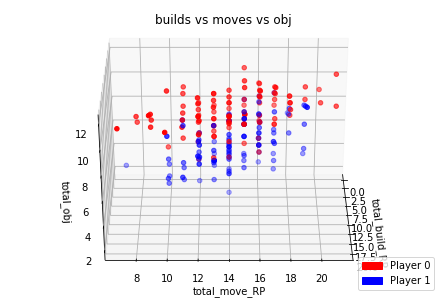

72


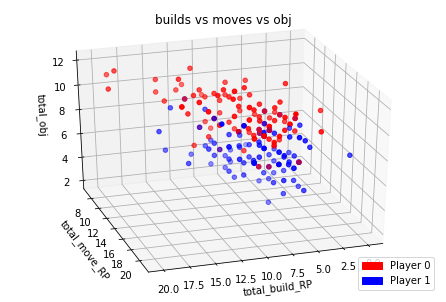

144


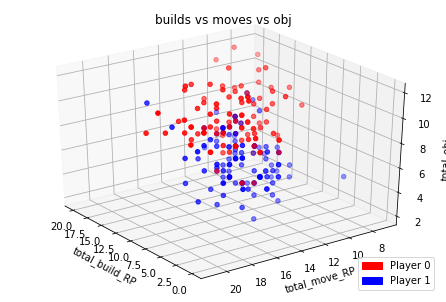

216


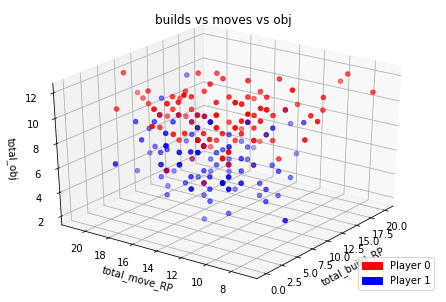

288


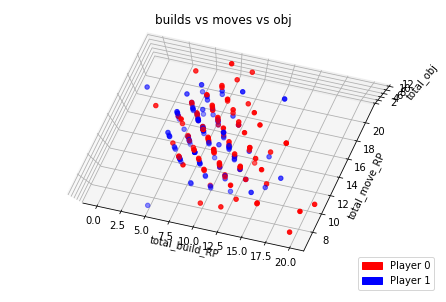

In [174]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
numAngles = 5
for i in range(0, 360, (int(360/numAngles))):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors=['red', 'blue']
    #plt.scatter(df['total_build_RP'], df['total_move_RP'], c=df['Player_Name'], cmap=col.ListedColormap(colors))
    ax.scatter(df['total_build_RP'], df['total_move_RP'],df['total_obj'], c=df['Player_Name'], cmap=col.ListedColormap(colors))
    classA = mpatches.Patch(color='red', label='Player 0')
    classB = mpatches.Patch(color='blue', label='Player 1')
    plt.legend(handles=[classA, classB], loc='lower right')
    plt.xlabel('total_build_RP')
    plt.ylabel('total_move_RP')
    ax.set_zlabel('total_obj')
    #plt.zlabel('total_obj')
    plt.title('builds vs moves vs obj')
    #plt.title('builds vs moves')
    #plt.tight_layout()
    ax.view_init(None, i)
    print(i)
    if (i==360-(int(360/numAngles))):
      ax.view_init(85, i)
      plt.show()
    else:
      plt.show()


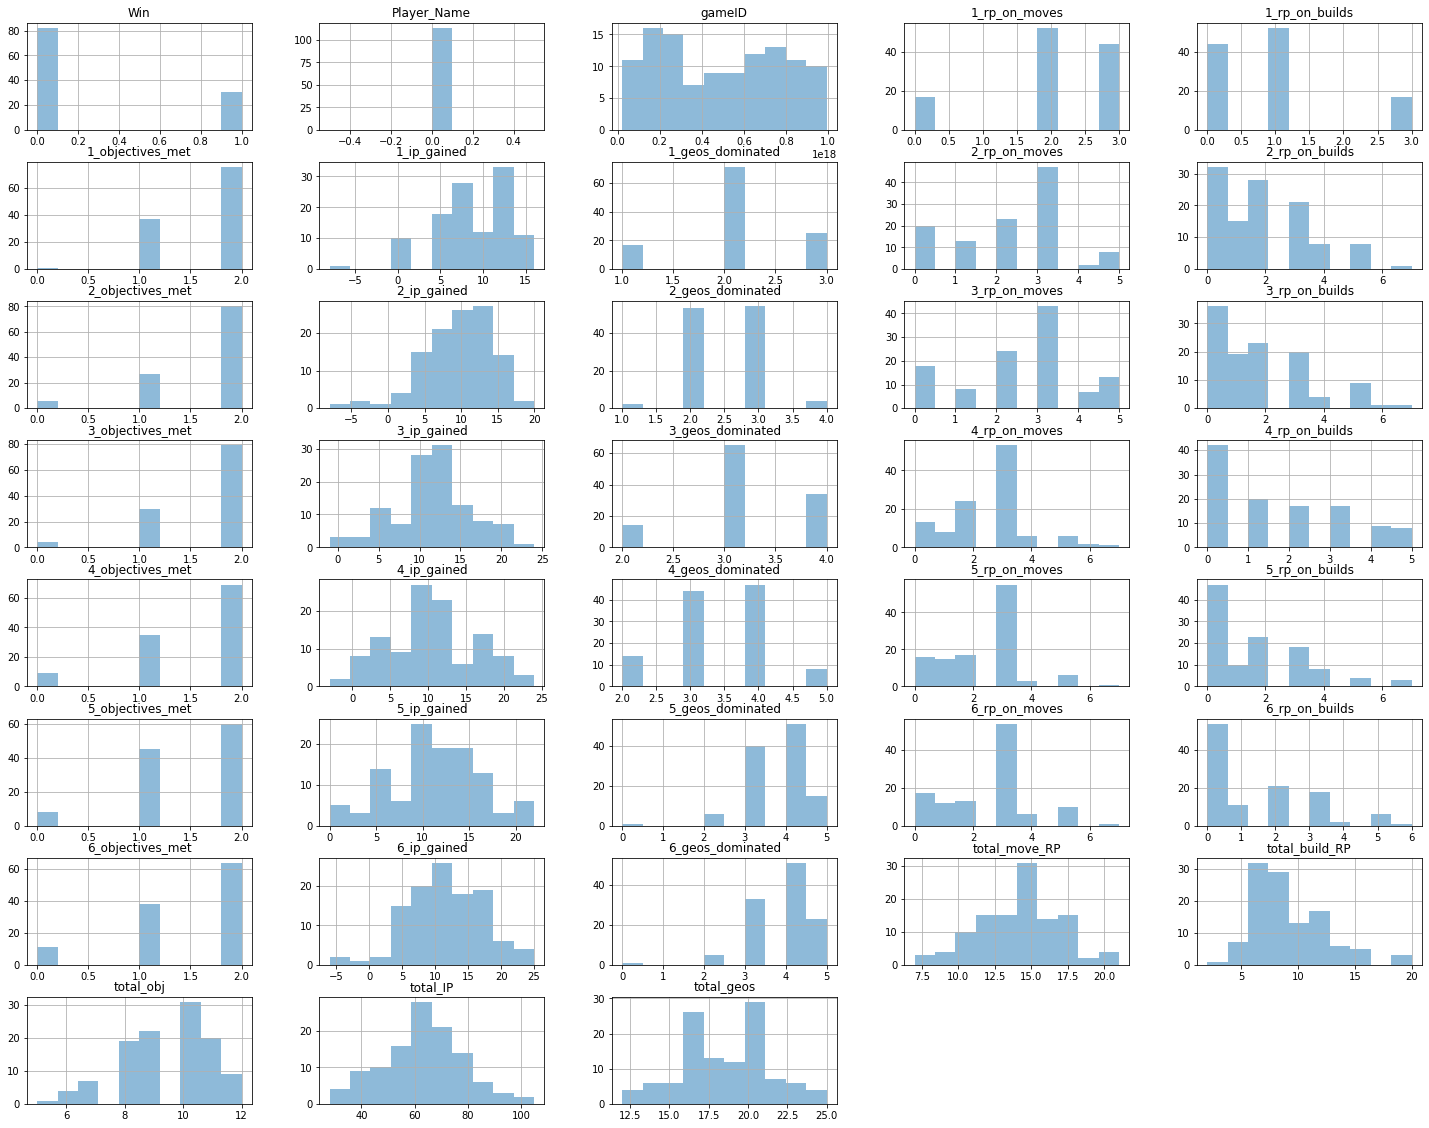

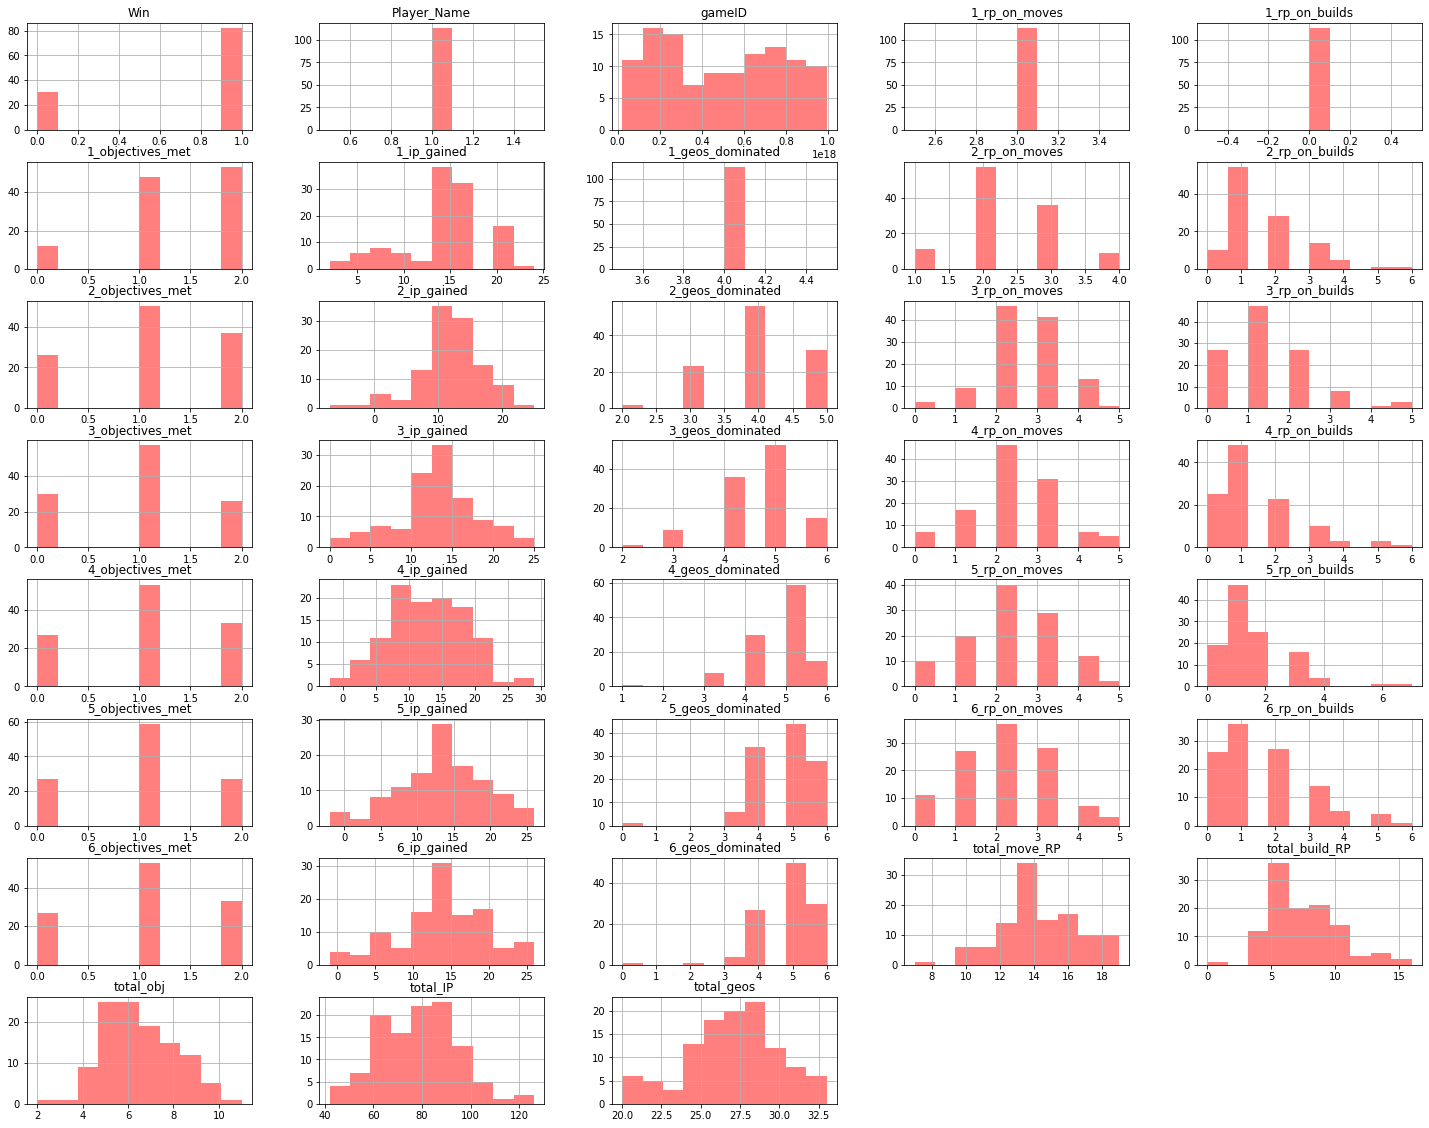

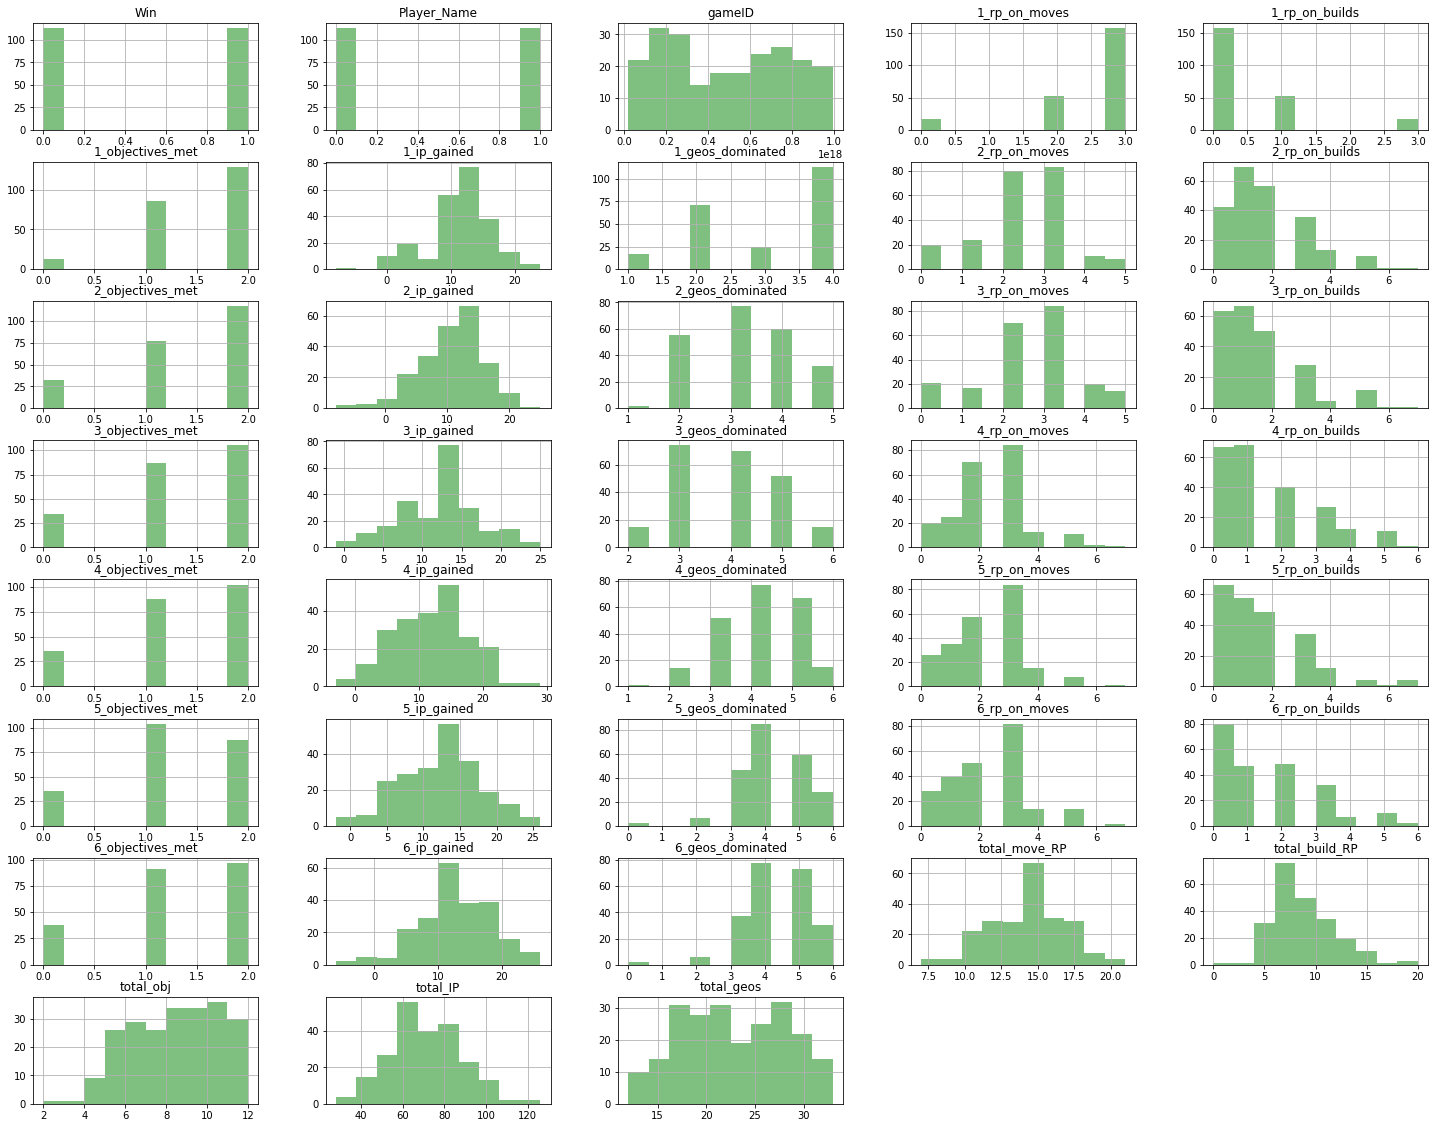

In [191]:

colors = ['blue', 'green']

#plt.figure(figsize=(25,25))
df_p0 = df.loc[df['Player_Name'] == 0]
df_p1 = df.loc[df['Player_Name'] == 1]
#_= plt.hist(df_p0, alpha =.5)#,layout=(10,5) )  
_ = df_p0.hist(alpha =.5, layout=(10,5), figsize=(25,25))
_ = df_p1.hist(alpha =.5, color='red', layout=(10,5), figsize=(25,25))
_ = df.hist(alpha =.5, color='green', layout=(10,5), figsize=(25,25))

#X_train.hist( layout=(10,5), figsize=(25,25))

# Setup data with transforms and pipelines


In [194]:
#transform setup
column_names = np.array(X_train.columns)
#print(column_names)
transformer = ColumnTransformer(transformers =
    [
     ('z', StandardScaler(), column_names)
#     ,('power_transform', PowerTransformer(), ['??', '??'])
    ]                                
)


transformer.fit(X_train)

ColumnTransformer(transformers=[('z', StandardScaler(),
                                 array(['Win', 'gameID', '1_rp_on_moves', '1_rp_on_builds',
       '1_objectives_met', '1_ip_gained', '1_geos_dominated',
       '2_rp_on_moves', '2_rp_on_builds', '2_objectives_met',
       '2_ip_gained', '2_geos_dominated', '3_rp_on_moves',
       '3_rp_on_builds', '3_objectives_met', '3_ip_gained',
       '3_geos_dominated', '4_rp_on_moves', '4_rp_on_builds',
       '4_objectives_met', '4_ip_gained', '4_geos_dominated',
       '5_rp_on_moves', '5_rp_on_builds', '5_objectives_met',
       '5_ip_gained', '5_geos_dominated', '6_rp_on_moves',
       '6_rp_on_builds', '6_objectives_met', '6_ip_gained',
       '6_geos_dominated', 'total_move_RP', 'total_build_RP', 'total_obj',
       'total_IP', 'total_geos'], dtype=object))])

In [267]:
nFEATURES =5
#pipeline setup
pipeline = Pipeline(steps=
    [('transformer', transformer),
     #('lda', LinearDiscriminantAnalysis(n_components=nFEATURES)), #can't have more than 1 component!
     ('lda', LinearDiscriminantAnalysis()),
     ('dtc', DecisionTreeClassifier())]
)

#model = TransformedTargetRegressor(
    #regressor = pipeline,
    #transformer = PowerTransformer()
#)


In [334]:
X_train_trans = transformer.fit_transform(X_train)

df_temp = pd.DataFrame(X_train_trans, columns=column_names)

power_scaler = PowerTransformer()
y_train_trans = power_scaler.fit_transform(np.array(y_train).reshape(-1,1))
df_temp['Y-PLAYER'] = y_train_trans
#display(df_temp)
#df_temp.hist(layout=(10,5), figsize=(25,25))
plt.show()

corr = df_temp.corr()
with pd.option_context('precision', 2):
    display(corr.style.background_gradient(vmin=-1.0, vmax=1.0, cmap='bwr'))

,2_rp_on_moves,2_rp_on_builds,3_rp_on_moves,3_rp_on_builds,4_rp_on_moves,4_rp_on_builds,5_rp_on_moves,5_rp_on_builds,6_rp_on_moves,6_rp_on_builds,Y-PLAYER
2_rp_on_moves,1.00,-0.57,-0.09,0.16,-0.08,0.03,0.08,0.02,-0.12,0.10,0.06
2_rp_on_builds,-0.57,1.00,0.13,-0.11,0.07,0.09,-0.07,0.06,0.07,-0.06,-0.08
3_rp_on_moves,-0.09,0.13,1.00,-0.64,-0.11,0.15,-0.00,-0.03,-0.03,-0.03,0.05
3_rp_on_builds,0.16,-0.11,-0.64,1.00,0.15,-0.13,0.11,-0.05,0.02,-0.08,-0.17
4_rp_on_moves,-0.08,0.07,-0.11,0.15,1.00,-0.61,-0.09,-0.04,0.09,-0.05,-0.14
4_rp_on_builds,0.03,0.09,0.15,-0.13,-0.61,1.00,0.19,-0.09,-0.03,0.03,-0.03
5_rp_on_moves,0.08,-0.07,-0.00,0.11,-0.09,0.19,1.00,-0.65,-0.06,0.11,-0.02
5_rp_on_builds,0.02,0.06,-0.03,-0.05,-0.04,-0.09,-0.65,1.00,0.14,-0.17,-0.09
6_rp_on_moves,-0.12,0.07,-0.03,0.02,0.09,-0.03,-0.06,0.14,1.00,-0.68,-0.14
6_rp_on_builds,0.10,-0.06,-0.03,-0.08,-0.05,0.03,0.11,-0.17,-0.68,1.00,0.07




# Manual Feature selection

In [274]:
#Using a minimal set of features chosen NOT by algorithm, but because they will be easy to collect with other datasets
#given the current dataset, there are some obvious 'Tells.'
#Manually reducing the dataset makes it more 'realistic' and applicable to human data sources

#Can the model predict the player type based off only a series of in-game moves?
X_train_moves = X_train.iloc[:,[7,8,12,13,17,18,22,23,27,28]]
X_test_moves = X_test.iloc[:,[7,8,12,13,17,18,22,23,27,28]]

#perhaps the turn-by-turn data will be hard to collect- can we predit player based off of only the total sums? 
X_train_totals = X_train.iloc[:,[32,33,34,36]]
X_test_totals = X_test.iloc[:,[32,33,34,36]]

# PCA feature selection

In [276]:
pca = PCA(4) #only using these many features
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#display(X_train_pca)

X_train_moves_pca = pca.fit_transform(X_train_moves)
X_test_moves_pca = pca.transform(X_test_moves)

X_train_totals_pca = pca.fit_transform(X_train_totals)
X_test_totals_pca = pca.transform(X_test_totals)

In [278]:
K_FOLDS =10
#accuracy = cross_val_score(DecisionTreeClassifier(), X_train_pca, y_train, cv=K_FOLDS)
accuracy = cross_val_score(DecisionTreeClassifier(), X_train_pca, y_train, cv=K_FOLDS)
print(f'DTC accuracy any: {np.mean(accuracy):.3f} (+/-{2*np.std(accuracy):.3f})')

accuracy = cross_val_score(DecisionTreeClassifier(), X_train_moves_pca, y_train, cv=K_FOLDS)
print(f'DTC accuracy moves: {np.mean(accuracy):.3f} (+/-{2*np.std(accuracy):.3f})')

accuracy = cross_val_score(DecisionTreeClassifier(), X_train_totals_pca, y_train, cv=K_FOLDS)
print(f'DTC accuracy totals: {np.mean(accuracy):.3f} (+/-{2*np.std(accuracy):.3f})')

DTC accuracy: 0.675 (+/-0.129)
DTC accuracy moves: 0.556 (+/-0.280)
DTC accuracy totals: 0.927 (+/-0.124)


# Comparison with different feature selection

In [ ]:
#print(X_train.info())
#print(X_train_moves.info())

In [ ]:
#using LDA on the already reduced feature sets decreases accuracy slightly. 
#the performance gains, in this case, are negligible

In [388]:
datasets =[X_train, X_train_totals,X_train_moves,]
datasets_test =[X_test, X_test_totals,X_test_moves,]
dataNames =["X_train", "X_train_totals","X_train_moves"]
i=0
print("decision tree: ")
for X in datasets:
    #transform setup
    #if (X.type !=ndarray):
    column_names = np.array(X.columns)
    #else:
    #  column_names = np.array(X_train.columns)
    #print(column_names)
    transformer = ColumnTransformer(transformers =
        [
        ('z', StandardScaler(), column_names)
    #     ,('power_transform', PowerTransformer(), ['??', '??'])
        ]                                
    )
    transformer.fit(X)
    #make pipeline
    pipeline = Pipeline(steps=
        [('transformer', transformer),
        #('lda', LinearDiscriminantAnalysis(n_components=nFEATURES)), #can't have more than 1 component!
        #('lda', LinearDiscriminantAnalysis()),
        ('dtc', DecisionTreeClassifier())]
    )
    # evaluate model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(pipeline, X, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    # report performance
    print(dataNames[i] +' Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    n_scores = cross_val_score(pipeline, X, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    pipeline.fit(X,y_train)
    display("Test score: "+str(pipeline.score(datasets_test[i], y_test)))


    y_pred = pipeline.predict(datasets_test[i])
    display(confusion_matrix(y_test, y_pred))
    i+=1


decision tree: 
X_train Accuracy: 1.000 (0.000)


'Test score: 1.0'

array([[35,  0],
       [ 0, 40]])

X_train_totals Accuracy: 0.940 (0.063)


'Test score: 0.9066666666666666'

array([[33,  2],
       [ 5, 35]])

X_train_moves Accuracy: 0.669 (0.145)


'Test score: 0.6933333333333334'

array([[24, 11],
       [12, 28]])

#Different models

In [390]:
datasets =[X_train, X_train_totals,X_train_moves,]
datasets_test =[X_test, X_test_totals,X_test_moves,]
dataNames =["X_train", "X_train_totals","X_train_moves"]
i=0
print("Naive Bayes: ")
for X in datasets:
    #transform setup
    #if (X.type !=ndarray):
    column_names = np.array(X.columns)
    #else:
    #  column_names = np.array(X_train.columns)
    #print(column_names)
    transformer = ColumnTransformer(transformers =
        [
        ('z', StandardScaler(), column_names)
    #     ,('power_transform', PowerTransformer(), ['??', '??'])
        ]                                
    )
    transformer.fit(X)
    #make pipeline
    pipeline = Pipeline(steps=
        [('transformer', transformer),
        #('lda', LinearDiscriminantAnalysis(n_components=nFEATURES)), #can't have more than 1 component!
        #('lda', LinearDiscriminantAnalysis()),
        ('dtc', GaussianNB())]
    )
    # evaluate model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(pipeline, X, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    # report performance
    print(dataNames[i] +' Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    n_scores = cross_val_score(pipeline, X, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    pipeline.fit(X,y_train)
    display("Test score: "+str(pipeline.score(datasets_test[i], y_test)))
    
    
    y_pred = pipeline.predict(datasets_test[i])
    display(confusion_matrix(y_test, y_pred))
    i+=1

Naive Bayes: 
X_train Accuracy: 1.000 (0.000)


'Test score: 1.0'

array([[35,  0],
       [ 0, 40]])

X_train_totals Accuracy: 0.953 (0.049)


'Test score: 0.9333333333333333'

array([[33,  2],
       [ 3, 37]])

X_train_moves Accuracy: 0.676 (0.105)


'Test score: 0.72'

array([[25, 10],
       [11, 29]])

In [389]:
datasets =[X_train, X_train_totals,X_train_moves,]
datasets_test =[X_test, X_test_totals,X_test_moves,]
dataNames =["X_train", "X_train_totals","X_train_moves"]
i=0
print("SVC: ")
for X in datasets:
    #transform setup
    #if (X.type !=ndarray):
    column_names = np.array(X.columns)
    #else:
    #  column_names = np.array(X_train.columns)
    #print(column_names)
    transformer = ColumnTransformer(transformers =
        [
        ('z', StandardScaler(), column_names)
    #     ,('power_transform', PowerTransformer(), ['??', '??'])
        ]                                
    )
    transformer.fit(X)
    #make pipeline
    pipeline = Pipeline(steps=
        [('transformer', transformer),
        #('lda', LinearDiscriminantAnalysis(n_components=nFEATURES)), #can't have more than 1 component!
        #('lda', LinearDiscriminantAnalysis()),
        ('dtc', SVC())]
    )
    # evaluate model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(pipeline, X, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    # report performance
    print(dataNames[i] +' Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    
    n_scores = cross_val_score(pipeline, X, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    pipeline.fit(X,y_train)
    #print("test score: ")
    display("Test score: "+str(pipeline.score(datasets_test[i], y_test)))


    y_pred = pipeline.predict(datasets_test[i])
    display(confusion_matrix(y_test, y_pred))
    i+=1


SVC: 
X_train Accuracy: 0.982 (0.034)


'Test score: 0.9866666666666667'

array([[35,  0],
       [ 1, 39]])

X_train_totals Accuracy: 0.956 (0.043)


'Test score: 0.96'

array([[35,  0],
       [ 3, 37]])

X_train_moves Accuracy: 0.713 (0.088)


'Test score: 0.72'

array([[27,  8],
       [13, 27]])

# Analysis of Results